# Neural networks from scratch in numpy

In [1]:
import numpy as np

In [2]:
def activation(x):
  return 1.0 / (1.0 + np.exp(-x))

In [3]:
def initialise(no_nodes, mean=0.0, std=1.0):
  return np.array([np.random.normal(mean, std, [no_nodes[i], no_nodes[i-1] + 1]) for i in range(1, len(no_nodes))])

In [4]:
def forward(nn, inputs):
  outputs = inputs.transpose()
  for w in nn:
    outputs = np.vstack([outputs, np.ones(outputs.shape[1])])
    outputs = np.matmul(w, outputs)
    outputs = activation(outputs)
  outputs = outputs.transpose()
  return outputs

In [5]:
# Two inputs, five hidden, three hidden, two outputs
nn = initialise([2, 5, 3, 2])

# Show the weights
for i in nn:
  print(i)

[[ 0.6953841   1.45385423 -0.49773803]
 [ 1.83918287 -0.39585958  0.85545635]
 [-0.91160521  0.09040473  0.21539123]
 [ 0.40831095  1.27966411 -0.91403824]
 [ 1.92589696 -2.25852868  2.92581218]]
[[ 0.87123896  1.84300136  1.65684957 -0.74200385  0.20722549  0.18194186]
 [-0.20425646  0.29989368  1.96966822 -1.95101792  0.67524127 -0.71772415]
 [ 1.1706602  -0.06093658  0.43184685  0.18790227  1.76934189  0.36286506]]
[[-0.2847502   0.64262915  1.69948399  1.65526779]
 [-0.78992921 -2.28630322  1.40748149  0.19503925]]


In [6]:
p = forward(nn, np.array([[1, 2],[3,4]]))
# Show the output
print(p)

[[ 0.95821284  0.56761527]
 [ 0.9538786   0.62529362]]


In [7]:
inputs = np.random.uniform(0, 1, [1000, 2])
actuals = np.column_stack([inputs[:, 0] <= inputs[:, 1], inputs[:, 0] > inputs[:, 1]]).astype(float)

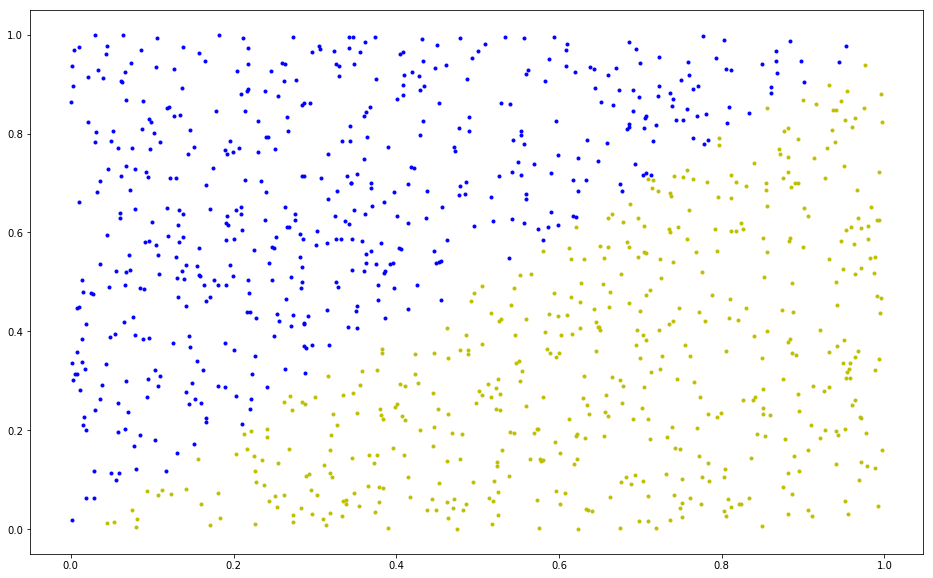

In [8]:
import matplotlib.pyplot as pl

pl.rcParams['figure.figsize'] = (16, 10)

blue = inputs[inputs[:, 0] <= inputs[:, 1]]
yell = inputs[inputs[:, 0] > inputs[:, 1]]

pl.plot(blue[:,0], blue[:,1], 'b.')
pl.plot(yell[:,0], yell[:,1], 'y.')

pl.show()

In [9]:
preds = forward(nn, inputs)

In [10]:
def cost(actuals, preds):
  return 0.5 * (actuals - preds)**2

In [11]:
cost(actuals, preds)

array([[ 0.46756663,  0.208774  ],
       [ 0.00058558,  0.07816616],
       [ 0.00065713,  0.10256414],
       ..., 
       [ 0.4662964 ,  0.18400676],
       [ 0.4668808 ,  0.19298386],
       [ 0.00066225,  0.09542963]])

In [12]:
preds * (1.0 - preds) * -(actuals - preds)

array([[ 0.030838  , -0.14773702],
       [-0.00113107,  0.09452027],
       [-0.00126661,  0.11222345],
       ..., 
       [ 0.03198006, -0.14476136],
       [ 0.03145525, -0.14618025],
       [-0.0012763 ,  0.10747773]])

In [13]:
def back(nn, inputs, outputs):
  for w in nn[]
  
  return nn

SyntaxError: invalid syntax (<ipython-input-13-ff017f25c7a3>, line 2)

In [14]:
# Do 1 training example first
def all_oij(nn, x):
  oij = []
  outputs = x.transpose()
  for w in nn:
    outputs = np.vstack([outputs, np.ones(outputs.shape[1])])
    outputs = np.matmul(w, outputs)
    outputs = activation(outputs)
    oij.append(outputs.transpose())
  return oij
    
oij = all_oij(nn, np.array([inputs[0]]))

In [15]:
oij

[array([[ 0.4439159 ,  0.78414372,  0.49821988,  0.3262213 ,  0.96290378]]),
 array([[ 0.94250443,  0.60391857,  0.94347651]]),
 array([[ 0.96702289,  0.35382046]])]

In [38]:
# For output layer
d_j_fin = (oij[-1] - actuals[0]) * oij[-1] * (1.0 - oij[-1])

In [39]:
deltas = np.tile(np.hstack([oij[-2], np.ones([1,1])]), [2,1]) * np.tile(d_j_fin.transpose(), [1,4])

In [40]:
eta = 0.001
# These are the new weights for last layer
nn[-1] - eta * deltas

array([[-0.28477926,  0.64261053,  1.6994549 ,  1.65523696],
       [-0.78978997, -2.286214  ,  1.40762087,  0.19518699]])

In [50]:
d_j_fin.shape, nn[-1].shape

((1, 2), (2, 4))

In [55]:
np.matmul(d_j_fin, nn[-1]) * np.hstack([oij[-2], np.ones([1,1])]) * (1.0 - np.hstack([oij[-2], np.ones([1,1])]))

array([[ 0.0058482 ,  0.08553563, -0.00829411,  0.        ]])

0.7310585786300049